# Case Study 1: Predicting Critical Temperature
By: Allen Hoskins

***
# 1. Introduction

Superconductors are materials that conduct electricity with little or no resistance without onset or buildup of heat. Due to this process, superconductors can create a magnetic field and generate a constant flow of electricity. These materials have a property called `critical temperature`. This property is the temperature at which this material acts as a superconductor. While most materials have an extremely low critical temperature (between 0 and 10 Kelvin), research has been ongoing to find materials with higher critical temperatures.

In this case study, we will utilize Linear Regression with both L1 and L2 regularization to predict the critical temperature of a compound to potentially identify superconductors.
***

# 2. METHODS

### DATA PREPROCESSING

The original data is composed of two separate CSV files, named `train.csv` and `unique_m.csv`. Once importing the needed packages for the case study, I read in the data and determined the shape and size of both datasets. The `train.csv` dataset consisted of 21,263 rows with 82 columns, and the `unique_m.csv` dataset consisted of 21,263 rows with 88 columns. The two datasets were then able to be merged on the index, and the duplicate response variable of `critical_temp` was able to be dropped, resulting in a final dataframe consisting of 21,263 rows with 168 columns. Before proceeding to Exploratory Data Analysis (EDA), I checked variable datatypes to determine if any other preprocessing needed to be done. With every datatype consisting of a float or integer, I was able to move on to EDA.

### EXPLORATORY DATA ANALYSIS (EDA)

With little information about the 168 explanatory variables and response variable within the data set, I needed to determine if the data needed to be scaled. I first plotted a histogram of the response variable to see the distribution (Fig. 1). The histogram showed that the `critical_temp` was heavily right skewed. To determine if any other variables in the data were heavily skewed, I ran quick descriptive statistics and plotted histograms of the following explanatory variables: `number_of_elements`, `entropy_atomic_mass`, `wtd_mean_atomic_mass`, `critical_temp`. All of these variables appeared to have a large variances and non-standard distributions (Fig 2). 

<figure>
  <figcaption>Fig. 1</figcaption>
  <img
  src="./superconduct/crit_temp_hist.png">
</figure>

<figure>
  <figcaption>Fig. 2</figcaption>
  <img
  src="./superconduct/variable_hist.png">
</figure>

### PREP DATA TO MODEL

Before scaling any of the explanatory variables, the data was separated into explanatory variables (X) and response variable (y). Once separated, I was able to scale the data. Sklearn provides multiple scalers to transform the data, but only `StandardScaler` and `PowerTransformer` were considered at this time. According to Sklearn's website, the definitions of the scalers are as follows:

> StandardScaler: Standardize features by removing the mean and scaling to unit variance.
> PowerTransformer: Apply a power transform feature wise to make data more Gaussian-like. Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired. Supports Yeo-Johnson and Box-Cox.

Both StandardScaler and PowerTransformer were run though the ElasticNet model, and since PowerTransformer produced the lowest mean RMSE, this will be the data set used moving forward. Note that since there are positive and negative integers in the data set, Yeo-Johnson was used instead of Box-Cox. Fig. 3 contains histograms of variables in Fig. 2 after utilizing `PowerTransformer`.

<figure>
  <figcaption>Fig. 3</figcaption>
  <img
  src="./superconduct/variable_hist_post_powertransformer.png">
</figure>

***
# 3. RESULTS

For modeling, I determined that using Sklearn's `ElasticNetCV` model was appropriate as it combines the `l1` and `l2` regularization of `Lasso` and `Ridge` models.

*Models use: 10-fold Cross validation (`Kfold`), `random_seed = 0`, and `max_iter = 20000`.*

**Model GridSearchCV:**

After preprocessing, EDA, and scaling the data, modeling was able to begin. Utilizing the power of Sklearn's `GridSearchCV`, the hyperparameters of `l1_ratio`, `tol`, and `eps` were run though the model and the best output using the `neg_root_mean_squared_error` scoring were output to be used in the final model.

**Grid Search Parameters:**

```
      "l1_ratio": np.arange(0.0, 1.0, 0.1), 
      "tol":      [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
      "eps":      [1e-3, 1e-2, 1e-1, 1, 10, 100]
```

**Best Model Output:**

```
      "l1_ratio": 0.2
      "tol":      0.01
      "eps":      0.001
```

**ElasticNetCV with GridSearchCV Tuned Parameters:**

After performing GridSearchCV to tune the model parameters, Sklearn's `cross_validate` was used to validate the model and determine final performance. The results of all 10 folds are below with a mean RMSE of 16.4637.

|      |   fit_time |   score_time | estimator                                                            |  test_score |  train_score |
|:----:|-----------:|-------------:|:---------------------------------------------------------------------|------------:|-------------:|
| 0    |    2.19916 |   0.00117993 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.7378 |      16.3605 |
| 1    |    2.15888 |   0.00172806 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.7811 |      16.3389 |
| 2    |    2.09171 |   0.00159836 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.2488 |      16.4508 |
| 3    |    2.13909 |   0.00134301 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.4203 |      16.4222 |
| 4    |    2.04526 |   0.00174427 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.5608 |      16.4041 |
| 5    |    2.05884 |   0.00163698 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     15.7617 |      16.4887 |
| 6    |    2.1159  |   0.00138688 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.2624 |      16.446  |
| 7    |    2.06758 |   0.00157595 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.7527 |      16.397  |
| 8    |    2.10658 |   0.00192094 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.4909 |      16.4127 |
| 9    |    2.11754 |   0.00175214 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     16.6208 |      16.4005 |
| mean |    2.11005 |   0.00158665 |                                                                      |     16.4637 |      16.4121 |

**Feature Importance:**

After completing the ElasticNetCV modeling, I wanted to determine which features were the most important in predicting `critical_temp`.

The top 10 features in the model were:

|     | Feature                      |   Coefficient |
|:---:|:-----------------------------|--------------:|
|  19 | Cu                           |       4.99197 |
|   7 | Ba                           |       4.88638 |
|  12 | Ca                           |       4.83552 |
|  38 | La                           |      -3.48937 |
| 163 | wtd_std_Valence              |      -3.24568 |
|   9 | Bi                           |       2.40671 |
| 162 | wtd_std_ThermalConductivity  |       2.29054 |
|  57 | Pr                           |      -2.27065 |
|  31 | Hg                           |       2.2417  |
| 146 | wtd_mean_ThermalConductivity |       1.89972 |
***

# 4. CONCLUSION

In conclusion, the best model that was chosen used a combination of L1 and L2 regularization (`l1_ratio = 0.2`). This model produced a mean RMSE of 16.4637. While not all models are useful, the output of this model can be used as a base in determining superconductors.
***

# Start Code:




#### Import Packages

In [1]:
# Import 
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import  GridSearchCV,KFold, cross_validate, cross_val_predict
from sklearn.linear_model import ElasticNetCV
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cufflinks as cf
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv(r'./superconduct/train.csv')
df_unique_m = pd.read_csv(r'./superconduct/unique_m.csv')

In [3]:
#merge two dataframes on indexes
df_merge = pd.merge(df_train, df_unique_m, left_index=True, right_index=True)

In [4]:
#delete duplicate and unused column
df_merge = df_merge.drop(['critical_temp_y','material'], axis=1)

#rename column from merge
df_merge.rename(columns = {'critical_temp_x':'critical_temp'}, inplace = True)

In [5]:
df_merge.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...   Ir   Pt   Au   Hg   Tl   Pb   Bi  Po  At  Rn  
0        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
1        47.094633  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
2        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
3        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  
4        51.968828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0   0   0  

[5 rows x 168 columns]

In [6]:
df_train.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [7]:
df_unique_m.head()

H  He   Li   Be    B    C    N    O    F  Ne  ...   Au   Hg   Tl   Pb  \
0  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
1  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
2  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
3  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   
4  0.0   0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   0  ...  0.0  0.0  0.0  0.0   

    Bi  Po  At  Rn  critical_temp                material  
0  0.0   0   0   0           29.0         Ba0.2La1.8Cu1O4  
1  0.0   0   0   0           26.0  Ba0.1La1.9Ag0.1Cu0.9O4  
2  0.0   0   0   0           19.0         Ba0.1La1.9Cu1O4  
3  0.0   0   0   0           22.0       Ba0.15La1.85Cu1O4  
4  0.0   0   0   0           23.0         Ba0.3La1.7Cu1O4  

[5 rows x 88 columns]

In [8]:
#Obtain basic information about data types for dataframes

df_train_info = df_train.info(verbose=True)
df_unique_info = df_unique_m.info(verbose = True)
df_merge_info = df_merge.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [9]:
#check shape of dataframes
df_train_shape = df_train.shape
df_unique_m_shape = df_unique_m.shape
df_merge_shape = df_merge.shape
print(f'Train DataFrame Shape: {df_train_shape}')
print(f'Unique_m DataFrame Shape:{df_unique_m_shape}')
print(f'Merged DataFrame Shape:{df_merge_shape}')

Train DataFrame Shape: (21263, 82)
Unique_m DataFrame Shape:(21263, 88)
Merged DataFrame Shape:(21263, 168)


In [10]:
#obtain basic descriptive statistics
df_merge.describe()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   
25%            58.041225              35.248990             0.966676   
50%            66.361592              39.918385             1.199541   
75%            78.116681              73.113234             1.444537   
max           208.980400             208.980400             1.983797   

       wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
count             21263.000000       21263.000000           21263.000000   
mean                  1.063884         115.601251              33.225218   
std                   0.401423          54.626887              26.967752   
min                   0.000000           0.000000               0.000000   
25%                   0.775363          78.512902              16.824174   
50%                   1.146783         122.906070              26.636008   
75%                   1.359418         154.119320              38.356908   
max                   1.958203         207.972460             205.589910   

       std_atomic_mass  ...            Ir            Pt            Au  \
count     21263.000000  ...  21263.000000  21263.000000  21263.000000   
mean         44.391893  ...      0.061558      0.034108      0.020535   
std          20.035430  ...      0.864859      0.307888      0.717975   
min           0.000000  ...      0.000000      0.000000      0.000000   
25%          32.890369  ...      0.000000      0.000000      0.000000   
50%          45.123500  ...      0.000000      0.000000      0.000000   
75%          59.322812  ...      0.000000      0.000000      0.000000   
max         101.019700  ...     45.000000      5.800000     64.000000   

                 Hg            Tl            Pb            Bi       Po  \
count  21263.000000  21263.000000  21263.000000  21263.000000  21263.0   
mean       0.036663      0.047954      0.042461      0.201009      0.0   
std        0.205846      0.272298      0.274365      0.655927      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max        8.000000      7.000000     19.000000     14.000000      0.0   

            At       Rn  
count  21263.0  21263.0  
mean       0.0      0.0  
std        0.0      0.0  
min        0.0      0.0  
25%        0.0      0.0  
50%        0.0      0.0  
75%        0.0      0.0  
max        0.0      0.0  

[8 rows x 168 columns]

***
## Exploratory Data Analysis

In [11]:
crit_temp_hist = df_merge['critical_temp'].iplot(
                                                kind='hist',
                                                bins=100,
                                                xTitle='Critical Temperature',
                                                linecolor='black',
                                                yTitle='count',
                                                title='Histogram of Critical Temperature')


In [12]:
scatter_cols = ['number_of_elements','entropy_atomic_mass','wtd_mean_atomic_mass','wtd_range_atomic_mass']
df_scatter = df_merge[scatter_cols]
df_scatter.iplot(kind='histogram',opacity=.75,title='Variable Histograms',subplots=True,xTitle='Value',yTitle='Count')

***
## Begin Modeling

In [13]:
# Subset of columns to transform
scale_cols = df_merge.columns[df_merge.columns != 'critical_temp']

# Scale Columns
#sc = StandardScaler()
sc = PowerTransformer()
df_merge[scale_cols] = sc.fit_transform(df_merge[scale_cols])

### Visualize Features after Scaling

In [14]:
df_scatter_scaled = df_merge[scatter_cols]

df_scatter_scaled.iplot(kind='histogram',
                        opacity=.75,
                        title='Variable Histograms: After Power Transformer Standardiztion',
                        subplots=True,
                        xTitle='Value',
                        yTitle='Count')

In [15]:
#Specififying Stratified Kfold for cv.
kfcv = KFold(n_splits=10,random_state=0,shuffle=True)

In [16]:
#Set target and feature columns
target_col = ['critical_temp']
feature_cols = df_merge.loc[:, ~df_merge.columns.isin(target_col)].columns
y = df_merge.critical_temp
X = df_merge[feature_cols]

In [17]:
%%time
# Grid search for Linear Regression task 1

lr_grid={"l1_ratio":np.arange(0.0,1.0,0.1), 
      "tol": [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
      "eps":[1e-3, 1e-2, 1e-1,1,10,100]
      }

model=ElasticNetCV(random_state = 0,max_iter=20000)

model_gs=GridSearchCV(model,
                       lr_grid,
                       cv = kfcv,
                       n_jobs=-1,
                       scoring = "neg_root_mean_squared_error")

model_gs.fit(X,y)
best_params = model_gs.best_params_
print(f'Grid Search Best Parameters{best_params}')

Grid Search Best Parameters{'eps': 0.001, 'l1_ratio': 0.2, 'tol': 0.001}
CPU times: user 24.6 s, sys: 10.8 s, total: 35.4 s
Wall time: 9min 54s


In [18]:
model_ = ElasticNetCV(l1_ratio =.2 ,
                        tol =0.01,
                        eps =0.001,
                        random_state = 0,
                        max_iter = 10000)

model_score = cross_validate(model_, X, y,
                            scoring='neg_root_mean_squared_error',
                            cv=kfcv,
                            return_estimator=True,
                            n_jobs=-1,
                            return_train_score=True)

model_results = pd.DataFrame(model_score)
model_results.loc['mean'] = model_results.mean()
print(model_results.to_markdown())

|      |   fit_time |   score_time | estimator                                                            |   test_score |   train_score |
|:-----|-----------:|-------------:|:---------------------------------------------------------------------|-------------:|--------------:|
| 0    |    2.32569 |   0.00152707 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     -16.8067 |      -16.419  |
| 1    |    2.40267 |   0.00181389 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     -16.7944 |      -16.3724 |
| 2    |    2.3397  |   0.00154996 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     -16.2967 |      -16.478  |
| 3    |    2.44757 |   0.00121331 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     -16.4186 |      -16.4248 |
| 4    |    2.35929 |   0.00138617 | ElasticNetCV(l1_ratio=0.2, max_iter=10000, random_state=0, tol=0.01) |     -16.5903 |      -16.4359 |
| 5    |    2.41062 |   0.0

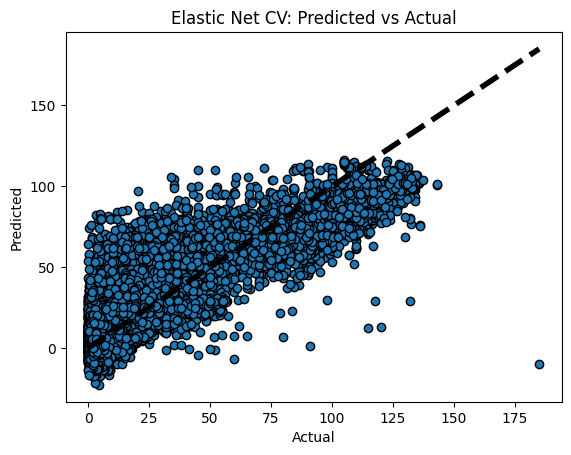

In [19]:
cv_pred = cross_val_predict(model_, X, y, cv=kfcv ,n_jobs=-1)

fig, ax = plt.subplots()
ax.scatter(y, cv_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=4)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Elastic Net CV: Predicted vs Actual")
plt.show()

In [20]:
#obtain average coefficent for each feature
df = pd.DataFrame()
for i in range(10):
    df_ = pd.DataFrame(list(zip(model_score['estimator'][i].coef_, X.columns)),columns = ['Coefficient','Feature'])
    df = pd.concat([df_,df],axis=0)

avg_feat_coef = df.groupby('Feature', as_index=False)['Coefficient'].mean()
avg_feat_coef = avg_feat_coef.sort_values(by='Coefficient', key=abs, ascending=False)

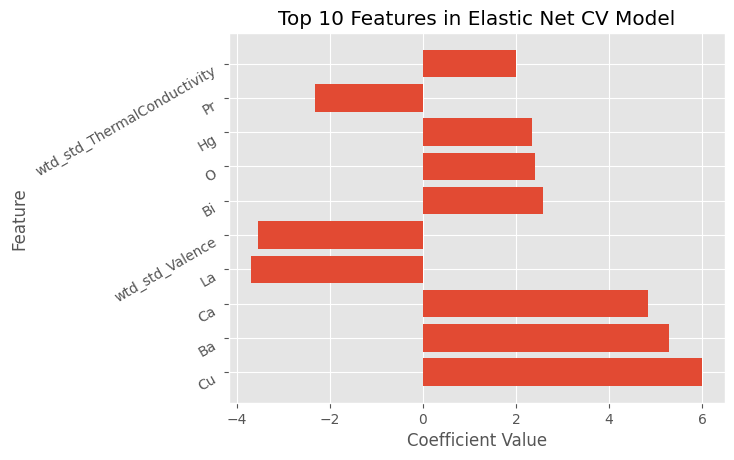

In [21]:
top_10_features = avg_feat_coef.head(10)

plt.style.use('ggplot')
plt.barh(top_10_features['Feature'],top_10_features['Coefficient'])
plt.title('Top 10 Features in Elastic Net CV Model')
plt.ylabel('Feature')
plt.xlabel('Coefficient Value')
plt.yticks(rotation=30, va='top')
plt.show()